Load in data    

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np

data_train = read_csv("data_mnist.csv")
data_test = read_csv("test_mnist.csv")
y = data_train["label"]
X = data_train.iloc[:,1:]
# Split Data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=1,stratify=y)

In [3]:
start, end, step=2,4,1

In [4]:
train_score, test_score, cv_score = [],[],[]
best_k, best_accuracy = 0,0
for i in range(start, end, step):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))
    cv = cross_val_score(knn, X, y, cv=5)
    avg_cv_score = np.mean(cv)
    cv_score.append(avg_cv_score)
    if avg_cv_score > best_accuracy:
        best_accuracy=avg_cv_score
        best_k=i


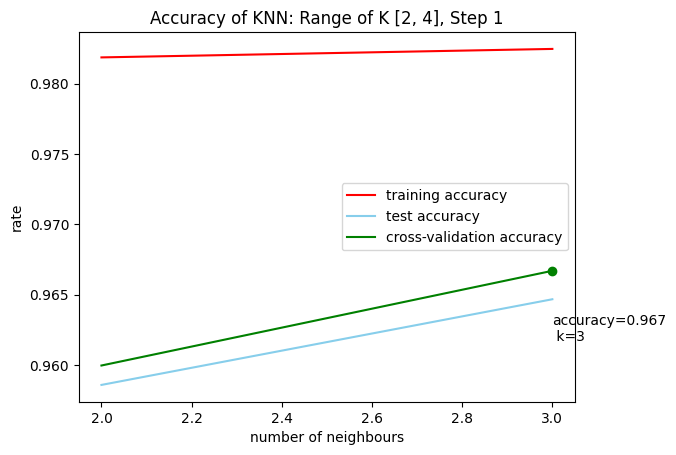

In [6]:
x_axix = range(start, end, step)
plt.title('Accuracy of KNN: Range of K ['+str(start)+', '+str(end)+'], Step '+str(step))
plt.plot(x_axix, train_score, color='red', label='training accuracy')
plt.plot(x_axix, test_score,  color='skyblue', label='test accuracy')
plt.plot(x_axix, cv_score,  color='green', label='cross-validation accuracy')
plt.plot(best_k,best_accuracy,'go')
show_max='accuracy='+str(round(best_accuracy,3))+'\n k='+str(best_k) 
# move the text down a little bit
plt.annotate(show_max,xytext=(best_k,best_accuracy-0.005),xy=(best_k,best_accuracy))
plt.legend() # 显示图例
plt.xlabel('number of neighbours')
plt.ylabel('rate')
plt.show()

In [5]:
print(train_score)
print(test_score)
print(cv_score)

[0.9818730158730159, 0.9824761904761905]
[0.9585714285714285, 0.9646666666666667]
[0.9599523809523809, 0.9666904761904762]


In [25]:
def auto_tune_knn(start, end, step,p):
    train_score, test_score, cv_score = [],[],[]
    best_k, best_accuracy = 0,0
    for i in range(start, end, step):
        knn = KNeighborsClassifier(n_neighbors=i,p=p,n_jobs=-1)
        knn.fit(X_train,y_train)
        train_score.append(knn.score(X_train,y_train))
        test_score.append(knn.score(X_test,y_test))
        cv = cross_val_score(knn, X, y, cv=5)
        avg_cv_score = np.mean(cv)
        cv_score.append(avg_cv_score)
        if avg_cv_score > best_accuracy:
            best_accuracy=avg_cv_score
            best_k=i
    x_axix = range(start, end, step)
    plt.title('Accuracy of KNN: Range of K ['+str(start)+', '+str(end)+'], Step '+str(step))
    plt.plot(x_axix, train_score, color='red', label='training accuracy')
    plt.plot(x_axix, test_score,  color='skyblue', label='test accuracy')
    plt.plot(x_axix, cv_score,  color='green', label='cross-validation accuracy')
    plt.plot(best_k,best_accuracy,'go')
    show_max='accuracy='+str(round(best_accuracy,3))+'\n k='+str(best_k) 
    # move the text down a little bit
    plt.annotate(show_max,xytext=(best_k,best_accuracy-0.005),xy=(best_k,best_accuracy))
    plt.legend() # 显示图例
    plt.xlabel('number of neighbours')
    plt.ylabel('rate')
    plt.show()

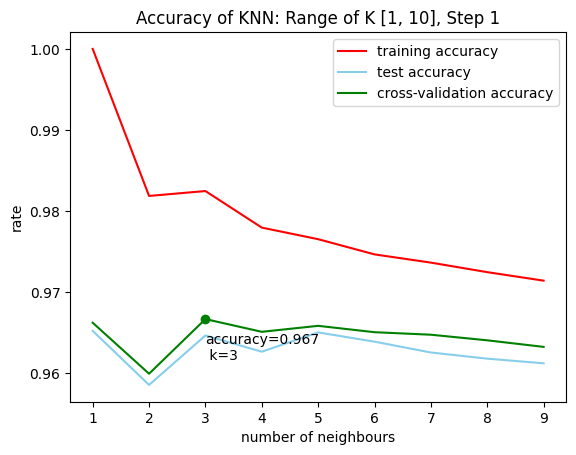

In [26]:
auto_tune_knn(1,10,1,2)

In [3]:
knn = KNeighborsClassifier(n_neighbors=3,p=2,n_jobs=-1)
knn.fit(X,y)
result= knn.predict(data_test)
df = DataFrame(data={'ImageId':range(1,len(data_test)+1),'Label':list(result)})
df.to_csv("MNISTResults.csv")
